# **Data Understanding & Preparation**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/data.zip # Extraire les dossiers des images

In [ ]:
import os
print('total training COVID-19 images:', len(os.listdir('/content/data/TRAIN/COVID-19')))

total training COVID-19 images: 20


In [ ]:
print('total training Healthy images:', len(os.listdir('/content/data/TRAIN/Healthy')))

total training Healthy images: 19


In [ ]:
print('total validation COVID-19 images:', len(os.listdir('/content/data/VAL/COVID-19')))

total validation COVID-19 images: 5


In [ ]:
print('total validation Healthy images:', len(os.listdir('/content/data/VAL/Healthy')))

total validation Healthy images: 5


In [ ]:
train_dir = '/content/data/TRAIN'
validation_dir = '/content/data/VAL'


# **Convolution Neural Network Architecture Design**

In [ ]:
from keras import models
from keras.layers import MaxPooling2D,Dense,Flatten,Conv2D
model = models.Sequential()
model.add(Conv2D(128, (3, 3), activation='relu',
                        input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='sigmoid'))
model.add(Dense(500, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 128)     0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      73792     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 186624)            0         
                                                                 
 dense_2 (Dense)             (None, 1000)             

# **Data Augmentation**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.8,
    horizontal_flip=False,
    vertical_flip=True,
    fill_mode='nearest')
Val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(227, 227),
        batch_size=2,
        class_mode='binary')
validation_generator = Val_datagen.flow_from_directory(
        validation_dir,
        target_size=(227, 227),
        batch_size=2,
        class_mode='binary')

Found 39 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


# **Convolution Neural Network Learning**

In [ ]:
from tensorflow.keras.optimizers import Adam
nb_train_samples = 39
nb_validation_samples = 10
epochs = 6
batch_size = 5
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit_generator(
            train_generator,
            steps_per_epoch=nb_train_samples // batch_size,
            epochs=epochs,
            validation_data=validation_generator,
            validation_steps=nb_validation_samples // batch_size)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/6
7/7 [==============================] - 6s 778ms/step - loss: 1.4278 - accuracy: 0.7857 - val_loss: 2.1203 - val_accuracy: 0.7500
Epoch 2/6
7/7 [==============================] - 6s 789ms/step - loss: 1.9856 - accuracy: 0.3571 - val_loss: 0.7614 - val_accuracy: 0.5000
Epoch 3/6
7/7 [==============================] - 5s 757ms/step - loss: 0.8328 - accuracy: 0.6429 - val_loss: 0.7078 - val_accuracy: 0.5000
Epoch 4/6
7/7 [==============================] - 5s 774ms/step - loss: 0.6402 - accuracy: 0.5714 - val_loss: 2.4290 - val_accuracy: 0.0000e+00
Epoch 5/6
7/7 [==============================] - 5s 768ms/step - loss: 0.8404 - accuracy: 0.5000 - val_loss: 0.6974 - val_accuracy: 0.5000
Epoch 6/6
7/7 [==============================] - 5s 778ms/step - loss: 0.6779 - accuracy: 0.6429 - val_loss: 0.4794 - val_accuracy: 0.7500


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


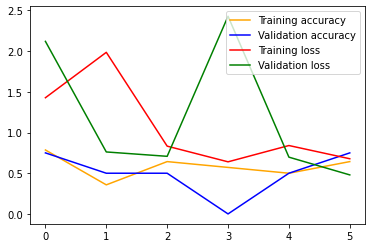

In [ ]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.figure()
plt.plot(history.history['accuracy'], 'orange', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'blue', label='Validation accuracy')
plt.plot(history.history['loss'], 'red', label='Training loss')
plt.plot(history.history['val_loss'], 'green', label='Validation loss')
plt.legend()
plt.show()

# **Testing CNN Model**

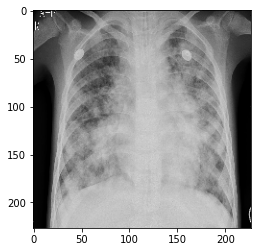

Predicted: [[0.33595544]] Healthy


In [ ]:
import numpy as np
from keras.preprocessing import image
img_path='/content/data/TEST/Healthy.jpeg'
img = image.load_img(img_path, target_size=(227, 227))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
print(score)
if score<0.5:
  print("COVID-19")
else:
  print("Healthy")

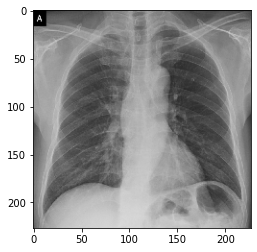

Predicted: [[0.26278782]] Healthy


In [ ]:
img_path='/content/data/TEST/COVID-19.jpeg'
img = image.load_img(img_path, target_size=(227, 227))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
print('Predicted:', score, 'Healthy' if score < 0.5 else 'COVID-19')

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['COVID-19', 'Healthy']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[5 0]
 [5 0]]
Classification Report
              precision    recall  f1-score   support

    COVID-19       0.50      1.00      0.67         5
     Healthy       0.00      0.00      0.00         5

    accuracy                           0.50        10
   macro avg       0.25      0.50      0.33        10
weighted avg       0.25      0.50      0.33        10



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
